In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/agile/heart.csv")


# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# List of algorithms to evaluate
algorithms = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Different training and test data sizes to try
data_sizes = [0.6, 0.7, 0.8, 0.9]

# Loop through algorithms
for name, model in algorithms.items():
    print(f"Algorithm: {name}")
    for size in data_sizes:
        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - size, random_state=42)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        print(f"Training data size: {size:.1%}, Test accuracy: {accuracy:.4f}")
    print()


#ML algos for heart.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Algorithm: Decision Tree
Training data size: 60.0%, Test accuracy: 0.9854
Training data size: 70.0%, Test accuracy: 0.9708
Training data size: 80.0%, Test accuracy: 0.9854
Training data size: 90.0%, Test accuracy: 0.9709

Algorithm: Random Forest
Training data size: 60.0%, Test accuracy: 0.9927
Training data size: 70.0%, Test accuracy: 0.9805
Training data size: 80.0%, Test accuracy: 0.9854
Training data size: 90.0%, Test accuracy: 0.9709

Algorithm: SVM
Training data size: 60.0%, Test accuracy: 0.6732
Training data size: 70.0%, Test accuracy: 0.6753
Training data size: 80.0%, Test accuracy: 0.6829
Training data size: 90.0%, Test accuracy: 0.6796

Algorithm: Logistic Regression
Training data size: 60.0%, Test accuracy: 0.8024


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Training data size: 70.0%, Test accuracy: 0.8117
Training data size: 80.0%, Test accuracy: 0.7854


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training data size: 90.0%, Test accuracy: 0.7961

Algorithm: KNN
Training data size: 60.0%, Test accuracy: 0.7024
Training data size: 70.0%, Test accuracy: 0.7143
Training data size: 80.0%, Test accuracy: 0.7317
Training data size: 90.0%, Test accuracy: 0.7767

Algorithm: Naive Bayes
Training data size: 60.0%, Test accuracy: 0.8146
Training data size: 70.0%, Test accuracy: 0.8149
Training data size: 80.0%, Test accuracy: 0.8000
Training data size: 90.0%, Test accuracy: 0.7961



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
9/9 [==============================] - 0s 3ms/step - loss: 0.3485 - accuracy: 0.8444
Test loss: 0.3485, Test accuracy: 0.8444


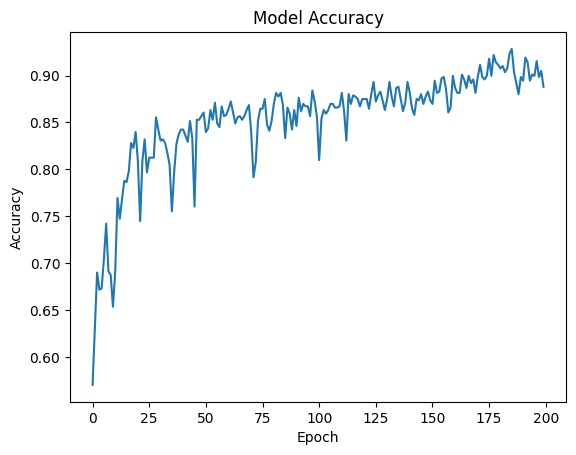

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/agile/heart.csv")

x = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Define a function for creating the model
def create_model(hidden_layers=2, neurons=100, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=13))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Tune hyperparameters
hidden_layers = 3  # Increase hidden layers
neurons = 128  # Increase the number of neurons
activation = 'relu'  # Change activation function to 'relu'
epochs = 200  # Increase epochs

# Create and compile the model
model = create_model(hidden_layers, neurons, activation)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

# Plot training history
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#DNN for heart.csv